In [3]:
print("hello world ")

hello world 


In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
0,CUST_0001,47.0,Male,North,Post-Graduate,Self-Employed,7.067595e+04,1997.92,Business,774.0,2,195,0.282,2020-06-01,0
1,CUST_0002,40.0,Male,North,Primary,Salaried,4.702917e+04,17790.79,Car,760.0,3,149,0.058,2023-05-18,0
2,CUST_0003,49.0,Male,West,Post-Graduate,Self-Employed,NaN,30668.07,Business,682.0,2,124,0.140,2023-11-11,0
3,CUST_0004,60.0,Female,South,Secondary,Salaried,2.793471e+04,5813.85,Other,634.0,1,118,0.090,2019-11-05,0
4,CUST_0005,39.0,Male,South,Graduate,Salaried,1.331462e+06,9904.94,Education,796.0,0,95,0.267,2022-06-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,CUST_6996,NaN,Female,West,Primary,Salaried,1.230904e+05,13810.99,Home,594.0,2,154,0.477,2021-12-23,0
6996,CUST_6997,51.0,Male,North,Secondary,NaN,1.661660e+05,80631.16,Car,NaN,2,241,0.161,2021-10-29,0
6997,CUST_6998,35.0,Male,East,Post-Graduate,NaN,5.132373e+04,20838.83,Education,740.0,0,160,0.481,2021-05-15,0
6998,CUST_6999,41.0,Female,South,Graduate,Salaried,8.672716e+04,25600.12,Education,622.0,0,187,0.189,2021-06-14,0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7000 non-null   str    
 1   age                6650 non-null   float64
 2   gender             6790 non-null   str    
 3   region             7000 non-null   str    
 4   education_level    7000 non-null   str    
 5   employment_type    6650 non-null   str    
 6   annual_income      6440 non-null   float64
 7   loan_amount        6720 non-null   float64
 8   loan_purpose       7000 non-null   str    
 9   credit_score       6580 non-null   float64
 10  repayment_history  7000 non-null   int64  
 11  transaction_count  7000 non-null   int64  
 12  spending_ratio     7000 non-null   float64
 13  join_date          7000 non-null   str    
 14  default_flag       7000 non-null   int64  
dtypes: float64(5), int64(3), str(7)
memory usage: 820.4 KB


In [7]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"{col} has {df[col].isnull().sum()} missing values.")
        

age has 350 missing values.
gender has 210 missing values.
employment_type has 350 missing values.
annual_income has 560 missing values.
loan_amount has 280 missing values.
credit_score has 420 missing values.


In [8]:
from sklearn.impute import SimpleImputer


imputer_emp = SimpleImputer(strategy='most_frequent')
df['employment_type'] = imputer_emp.fit_transform(df[['employment_type']]).ravel()

In [9]:
imputer_age = SimpleImputer(strategy='median')
df['age'] = imputer_age.fit_transform(df[['age']]).ravel()
df['age'] = df['age'].astype(int)

In [10]:
df['age'].info()

<class 'pandas.Series'>
RangeIndex: 7000 entries, 0 to 6999
Series name: age
Non-Null Count  Dtype
--------------  -----
7000 non-null   int64
dtypes: int64(1)
memory usage: 54.8 KB


In [11]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
knn_cols = ['annual_income', 'age', 'loan_amount']
df[knn_cols] = knn_imputer.fit_transform(df[knn_cols])

In [12]:
df['annual_income'].isnull().sum(), df['age'].isnull().sum(), df['loan_amount'].isnull().sum()

(np.int64(0), np.int64(0), np.int64(0))

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=42)
mice_cols = ['credit_score', 'annual_income', 'loan_amount']
df[mice_cols] = mice_imputer.fit_transform(df[mice_cols])
df['credit_score'] = df['credit_score'].round().astype(int)

In [14]:
df['credit_score'].isnull().sum(), df['annual_income'].isnull().sum(), df['loan_amount'].isnull().sum() 

(np.int64(0), np.int64(0), np.int64(0))

In [15]:
from sklearn.impute import SimpleImputer


imputer_emp = SimpleImputer(strategy='most_frequent')
df['gender'] = imputer_emp.fit_transform(df[['gender']]).ravel()

In [16]:
df['gender'].isnull().sum()

np.int64(0)

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7000 non-null   str    
 1   age                7000 non-null   float64
 2   gender             7000 non-null   str    
 3   region             7000 non-null   str    
 4   education_level    7000 non-null   str    
 5   employment_type    7000 non-null   str    
 6   annual_income      7000 non-null   float64
 7   loan_amount        7000 non-null   float64
 8   loan_purpose       7000 non-null   str    
 9   credit_score       7000 non-null   int64  
 10  repayment_history  7000 non-null   int64  
 11  transaction_count  7000 non-null   int64  
 12  spending_ratio     7000 non-null   float64
 13  join_date          7000 non-null   str    
 14  default_flag       7000 non-null   int64  
dtypes: float64(4), int64(4), str(7)
memory usage: 820.4 KB


In [18]:
annul_income_outliers = df[df['annual_income'] > 200000]
print(f"Number of annual income outliers: {len(annul_income_outliers)}")

Number of annual income outliers: 584


In [ ]:
import numpy as np

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] > upper_limit, upper_limit,
                 np.where(df[column] < lower_limit, lower_limit, df[column]))
    return df


for col in ['annual_income', 'loan_amount', 'credit_score']:
    df = handle_outliers(df, col)


Outliers handled successfully!


<Axes: xlabel='annual_income'>

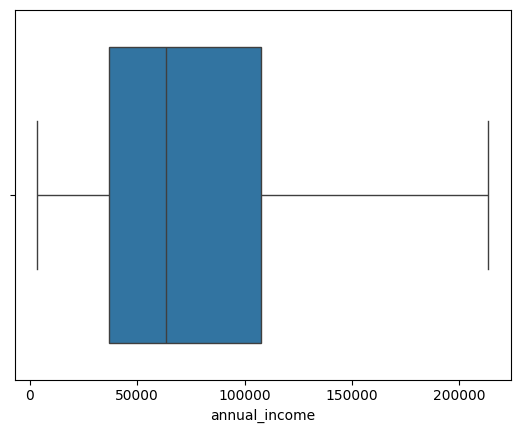

In [30]:
import seaborn as sns 
sns.boxplot(x=df['annual_income'])  

In [ ]:
import pandas as pd

df['join_date'] = pd.to_datetime(df['join_date'])

df['join_year'] = df['join_date'].dt.year
df['join_month'] = df['join_date'].dt.month
df['join_weekday'] = df['join_date'].dt.weekday 

df.drop(columns=['join_date'], inplace=True)

print("Date features extracted!")

Date features extracted!


In [33]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7000 non-null   str    
 1   age                7000 non-null   float64
 2   gender             7000 non-null   str    
 3   region             7000 non-null   str    
 4   education_level    7000 non-null   str    
 5   employment_type    7000 non-null   str    
 6   annual_income      7000 non-null   float64
 7   loan_amount        7000 non-null   float64
 8   loan_purpose       7000 non-null   str    
 9   credit_score       7000 non-null   float64
 10  repayment_history  7000 non-null   int64  
 11  transaction_count  7000 non-null   int64  
 12  spending_ratio     7000 non-null   float64
 13  default_flag       7000 non-null   int64  
 14  join_year          7000 non-null   int32  
 15  join_month         7000 non-null   int32  
 16  join_weekday       7000 non-null   

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


education_order = [['Primary', 'Secondary', 'Graduate', 'Post-Graduate']]

ord_enc = OrdinalEncoder(categories=education_order)
df['education_level_encoded'] = ord_enc.fit_transform(df[['education_level']])

print("Education Level encoded!")

Education Level encoded!


In [38]:
df['education_level_encoded']

0       3.0
1       0.0
2       3.0
3       1.0
4       2.0
       ... 
6995    0.0
6996    1.0
6997    3.0
6998    2.0
6999    0.0
Name: education_level_encoded, Length: 7000, dtype: float64

In [39]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()
df['gender_encoded'] = lbl_enc.fit_transform(df['gender'].astype(str))

print("Gender encoded!")

Gender encoded!


In [40]:
df['gender_encoded']

0       1
1       1
2       1
3       0
4       1
       ..
6995    0
6996    1
6997    1
6998    0
6999    0
Name: gender_encoded, Length: 7000, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['region', 'loan_purpose'], drop_first=True)

print("One-Hot Encoding Done for Region and Loan Purpose!")

One-Hot Encoding Done for Region and Loan Purpose!


In [42]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=700)
df['good_credit_flag'] = binarizer.fit_transform(df[['credit_score']])

In [43]:
df['good_credit_flag']

0       1.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
6995    0.0
6996    0.0
6997    1.0
6998    0.0
6999    0.0
Name: good_credit_flag, Length: 7000, dtype: float64

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer


kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
df['transaction_binned'] = kbins.fit_transform(df[['transaction_count']])

In [48]:
df['transaction_binned'].value_counts()

transaction_binned
2.0    2358
1.0    2335
0.0    2307
Name: count, dtype: int64

In [50]:
df['debt_to_income_ratio'] = df['loan_amount'] / df['annual_income']
# Handle infinite values (agar income 0 hui toh infinity aa jayega)
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].replace([np.inf, -np.inf], 0)

In [51]:
df['debt_to_income_ratio']

0       0.028269
1       0.378293
2       0.553711
3       0.208123
4       0.046404
          ...   
6995    0.112202
6996    0.475606
6997    0.406027
6998    0.295180
6999    0.571612
Name: debt_to_income_ratio, Length: 7000, dtype: float64

In [52]:
# np.log1p use karte hain (log(1+x)) taaki agar value 0 ho toh error na aaye
df['spending_ratio_log'] = np.log1p(df['spending_ratio'])

In [53]:
df['spending_ratio_log']

0       0.248421
1       0.056380
2       0.131028
3       0.086178
4       0.236652
          ...   
6995    0.390013
6996    0.149282
6997    0.392718
6998    0.173113
6999    0.346423
Name: spending_ratio_log, Length: 7000, dtype: float64

In [55]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['annual_income_transformed'] = pt.fit_transform(df[['annual_income']])

In [56]:
df['annual_income_transformed']

0       0.122979
1      -0.413022
2      -0.201884
3      -1.050549
4       1.761686
          ...   
6995    0.910174
6996    1.365245
6997   -0.300893
6998    0.405446
6999    0.043117
Name: annual_income_transformed, Length: 7000, dtype: float64

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['annual_income', 'loan_amount']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Data Scaling Complete!")

Data Scaling Complete!


In [60]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7000 non-null   str    
 1   age                        7000 non-null   float64
 2   gender                     7000 non-null   str    
 3   education_level            7000 non-null   str    
 4   employment_type            7000 non-null   str    
 5   annual_income              7000 non-null   float64
 6   loan_amount                7000 non-null   float64
 7   credit_score               7000 non-null   float64
 8   repayment_history          7000 non-null   int64  
 9   transaction_count          7000 non-null   int64  
 10  spending_ratio             7000 non-null   float64
 11  default_flag               7000 non-null   int64  
 12  join_year                  7000 non-null   int32  
 13  join_month                 7000 non-null   int32  
 14  joi